<a href="https://colab.research.google.com/github/souma21122002/Internship2025/blob/main/ELA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

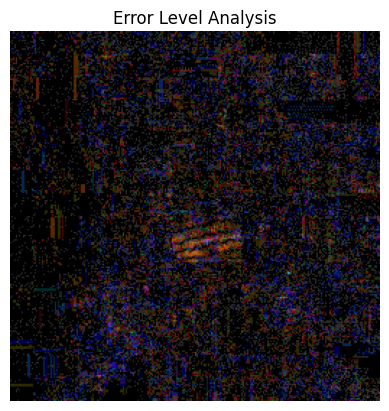

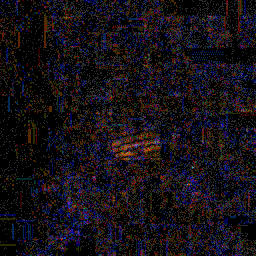

In [ ]:
from PIL import Image, ImageChops
import numpy as np
import matplotlib.pyplot as plt
import os

def error_level_analysis(image_path, output_path, quality=95):
    # Open the original image
    try:
        original = Image.open(image_path)
    except FileNotFoundError:
        print(f"Error: Input file not found at {image_path}")
        return None
    except Exception as e:
        print(f"Error opening image: {str(e)}")
        return None

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the image at specified quality level
    temp_path = os.path.join(os.path.dirname(output_path), 'temp.jpg')
    try:
        original.save(temp_path, 'JPEG', quality=quality)
        resaved = Image.open(temp_path)
    except Exception as e:
        print(f"Error saving/resaving image: {str(e)}")
        return None

    # Calculate the difference
    ela_image = ImageChops.difference(original, resaved)

    # Enhance the differences
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:  # Prevent division by zero
        max_diff = 1
    scale = 255.0/max_diff
    ela_image = Image.eval(ela_image, lambda x: x*scale)

    # Convert to RGB if needed (matplotlib expects RGB)
    if ela_image.mode != 'RGB':
        ela_image = ela_image.convert('RGB')

    # Save the ELA result
    try:
        ela_image.save(output_path)
    except Exception as e:
        print(f"Error saving ELA image: {str(e)}")
        return None

    # Clean up temporary file
    if os.path.exists(temp_path):
        os.remove(temp_path)

    # Display
    plt.imshow(ela_image)
    plt.title('Error Level Analysis')
    plt.axis('off')  # Hide axes
    plt.show()

    return ela_image

# Usage - make sure to include the output filename, not just directory
error_level_analysis(
    '/content/drive/MyDrive/ML_Intership/input/input.jpg',
    '/content/drive/MyDrive/ML_Intership/output/ela_output.jpg'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing image: /content/drive/MyDrive/ML_Intership/input/input3.jpg
ELA image saved to /content/drive/MyDrive/ML_Intership/output/ela_result.jpg


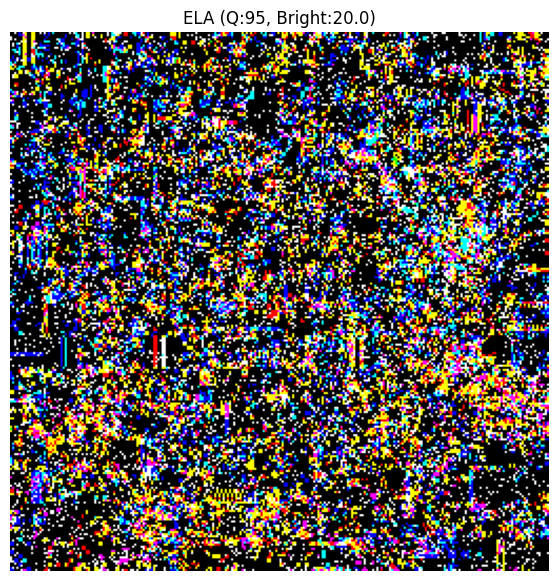

ELA image saved to /content/drive/MyDrive/ML_Intership/output/ela_result_q75.jpg


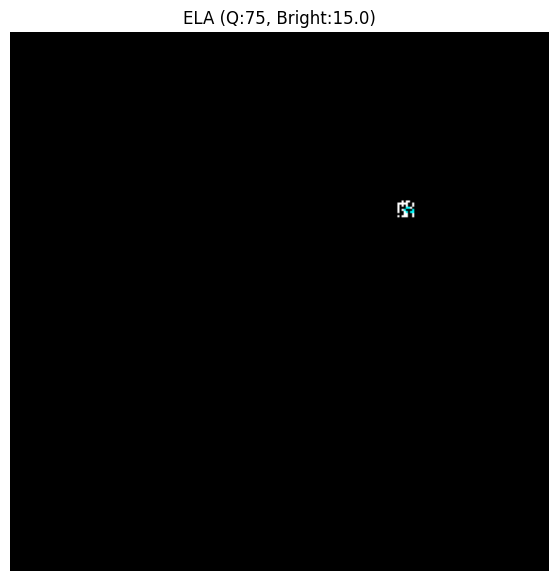

In [ ]:
from PIL import Image, ImageChops, ImageEnhance, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile

def error_level_analysis(image_path, output_path, quality=95, brightness_enhancer=15.0):
    """
    Performs Error Level Analysis (ELA) on an image to identify potential manipulations.

    Args:
        image_path (str): Full path to the input image file.
        output_path (str): Full path to save the resulting ELA image.
        quality (int): JPEG quality level (1-100) for re-saving. Default is 95.
        brightness_enhancer (float): Factor to enhance brightness of ELA image. Default is 15.0.

    Returns:
        PIL.Image.Image or None: The ELA image object if successful, None otherwise.
    """
    if not (1 <= quality <= 100):
        print("Error: Quality must be between 1 and 100.")
        return None

    try:
        original_image = Image.open(image_path)
        original_image = original_image.convert('RGB')
    except FileNotFoundError:
        print(f"Error: Input file not found at {image_path}")
        return None
    except UnidentifiedImageError:
        print(f"Error: Cannot identify image file at {image_path}")
        return None
    except Exception as e:
        print(f"Error opening image: {str(e)}")
        return None

    # Create output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Use temporary file
    temp_fd, temp_path = tempfile.mkstemp(suffix='.jpg')
    os.close(temp_fd)

    try:
        original_image.save(temp_path, 'JPEG', quality=quality)
        resaved_image = Image.open(temp_path).convert('RGB')
    except Exception as e:
        print(f"Error saving/re-saving image: {str(e)}")
        if os.path.exists(temp_path):
            os.remove(temp_path)
        return None

    # Calculate difference
    ela_image = ImageChops.difference(original_image, resaved_image)

    # Normalize differences
    extrema = ela_image.getextrema()
    max_diff = max(ex[1] for ex in extrema) if ela_image.mode == 'RGB' else extrema[1]
    max_diff = max(max_diff, 1)  # Prevent division by zero

    scale = 255.0 / max_diff
    ela_image = Image.eval(ela_image, lambda x: x * scale)

    # Enhance brightness if needed
    if brightness_enhancer > 1.0:
        enhancer = ImageEnhance.Brightness(ela_image)
        ela_image = enhancer.enhance(brightness_enhancer)
        ela_image = Image.eval(ela_image, lambda x: min(255, max(0, int(x))))

    # Save and display results
    try:
        ela_image.save(output_path)
        print(f"ELA image saved to {output_path}")

        plt.figure(figsize=(10, 7))
        plt.imshow(np.array(ela_image))
        plt.title(f'ELA (Q:{quality}, Bright:{brightness_enhancer})')
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error saving/displaying ELA image: {str(e)}")
    finally:
        if os.path.exists(temp_path):
            os.remove(temp_path)

    return ela_image

# --- Main Execution for Google Drive ---
if __name__ == "__main__":
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Set your specific paths
    BASE_DIR = '/content/drive/MyDrive/ML_Intership'
    INPUT_DIR = os.path.join(BASE_DIR, 'input')
    OUTPUT_DIR = os.path.join(BASE_DIR, 'output')

    # Ensure directories exist
    os.makedirs(INPUT_DIR, exist_ok=True)
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # Define your input filename (change this to your actual image filename)
    INPUT_FILENAME = 'input3.jpg'
    OUTPUT_FILENAME = 'ela_result.jpg'

    # Full paths
    input_path = os.path.join(INPUT_DIR, INPUT_FILENAME)
    output_path = os.path.join(OUTPUT_DIR, OUTPUT_FILENAME)

    # Check if input exists
    if not os.path.exists(input_path):
        print(f"Error: Input image not found at {input_path}")
        print("Please ensure:")
        print(f"1. The file '{INPUT_FILENAME}' exists in {INPUT_DIR}")
        print("2. Google Drive is properly mounted")
    else:
        # Run ELA with different settings
        print(f"Processing image: {input_path}")

        # Standard analysis
        ela_result = error_level_analysis(
            input_path,
            output_path,
            quality=95,
            brightness_enhancer=20.0
        )

        # Additional analysis with different settings
        if ela_result:
            error_level_analysis(
                input_path,
                os.path.join(OUTPUT_DIR, 'ela_result_q75.jpg'),
                quality=75,
                brightness_enhancer=15.0
            )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


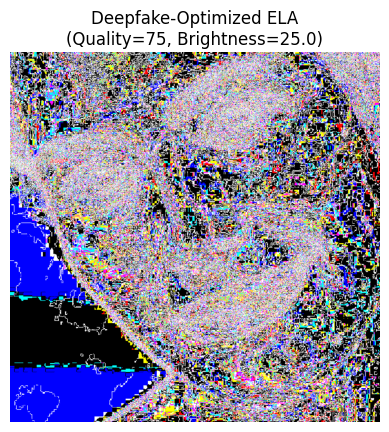

In [ ]:
from PIL import Image, ImageChops, ImageEnhance, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile

def optimized_ela_for_deepfake(image_path, output_path, quality=75, brightness_enhancer=25.0):
    """
    Optimized Error Level Analysis (ELA) for deepfake detection.

    Args:
        image_path (str): Path to input image.
        output_path (str): Path to save ELA result.
        quality (int): JPEG quality (lower = more artifacts). Default 75 for better detection.
        brightness_enhancer (float): Enhances subtle differences. Default 25.0 for deepfakes.

    Returns:
        PIL.Image.Image or None: ELA result if successful.
    """
    try:
        # Load and convert image to RGB
        original = Image.open(image_path).convert('RGB')

        # Create output directory if needed
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save temp JPEG with specified quality
        with tempfile.NamedTemporaryFile(suffix='.jpg') as tmp:
            original.save(tmp.name, 'JPEG', quality=quality)
            resaved = Image.open(tmp.name).convert('RGB')

            # Calculate ELA
            ela = ImageChops.difference(original, resaved)

            # Normalize and enhance
            max_diff = max([ex[1] for ex in ela.getextrema()] or [1])
            ela = Image.eval(ela, lambda x: min(255, int(x * (255.0 / max_diff))))
            ela = ImageEnhance.Brightness(ela).enhance(brightness_enhancer)

            # Save and display
            ela.save(output_path)
            plt.imshow(np.array(ela))
            plt.title('Deepfake-Optimized ELA\n(Quality={}, Brightness={})'.format(quality, brightness_enhancer))
            plt.axis('off')
            plt.show()

            return ela

    except Exception as e:
        print(f"Error: {str(e)}")
        return None

# Google Drive setup (Colab)
if __name__ == "__main__":
    from google.colab import drive
    drive.mount('/content/drive')

    # Configure paths
    input_path = '/content/drive/MyDrive/ML_Intership/input/input2.jpg'
    output_path = '/content/drive/MyDrive/ML_Intership/output/deepfake_ela.jpg'

    # Run optimized ELA
    if os.path.exists(input_path):
        optimized_ela_for_deepfake(input_path, output_path)
    else:
        print(f"Error: Input image not found at {input_path}")

Google Drive already mounted.
Input path: /content/drive/MyDrive/ML_Intership/input/input2.jpg
Output path: /content/drive/MyDrive/ML_Intership/output/deepfake_ela_gamma_enhanced.png
Input image found. Running ELA...


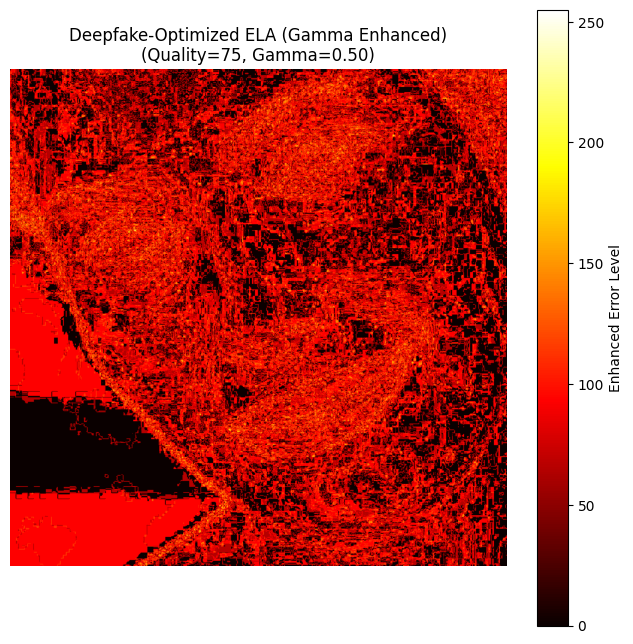

ELA processing complete. Result saved to /content/drive/MyDrive/ML_Intership/output/deepfake_ela_gamma_enhanced.png


In [ ]:
from PIL import Image, ImageChops, ImageEnhance, UnidentifiedImageError
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile

def optimized_ela_for_deepfake(image_path, output_path, quality=75, gamma_value=0.5):
    """
    Optimized Error Level Analysis (ELA) for deepfake detection.
    Uses gamma correction and grayscale conversion for better emphasis
    of subtle differences.

    Args:
        image_path (str): Path to input image.
        output_path (str): Path to save ELA result (grayscale).
        quality (int): JPEG quality used for re-saving (lower = more artifacts).
                       Default 75 often highlights differences well.
        gamma_value (float): Gamma correction value (lower = more amplification
                             of subtle errors/darker differences). Default 0.5
                             is good for making small differences prominent.
                             Use 1.0 for no gamma correction.

    Returns:
        PIL.Image.Image or None: ELA result (grayscale) if successful.
    """
    try:
        # Load and convert image to RGB
        original = Image.open(image_path).convert('RGB')

        # Create output directory if needed
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save temp JPEG with specified quality
        # Use a context manager for tempfile for automatic cleanup
        with tempfile.NamedTemporaryFile(suffix='.jpg', delete=False) as tmp_file:
             temp_filename = tmp_file.name
             original.save(temp_filename, 'JPEG', quality=quality)

        # Re-open the saved temporary file
        resaved = Image.open(temp_filename).convert('RGB')

        # Clean up the temporary file immediately after opening
        os.remove(temp_filename)


        # Calculate ELA (difference between original and resaved)
        # This results in an RGB image where each channel is the difference
        ela_rgb = ImageChops.difference(original, resaved)

        # Convert RGB difference to a single grayscale value per pixel
        # We can take the maximum difference across R, G, B channels
        ela_arr = np.array(ela_rgb)
        gray_ela_arr = np.max(ela_arr, axis=2) # Max difference across R, G, B

        # Normalize the grayscale difference array to the range [0, 1]
        max_diff = np.max(gray_ela_arr)
        if max_diff == 0:
            # If no difference, result is all zeros. Avoid division by zero.
            normalized_gray_ela = gray_ela_arr.astype(np.float32)
        else:
            normalized_gray_ela = gray_ela_arr.astype(np.float32) / max_diff

        # Apply Gamma correction
        # gamma < 1 brightens dark areas (small differences)
        gamma_corrected_ela_arr = normalized_gray_ela ** gamma_value

        # Scale the result back to the 0-255 range and convert to uint8
        final_ela_arr = (gamma_corrected_ela_arr * 255).astype(np.uint8)

        # Convert the numpy array back to a PIL Image (grayscale 'L')
        final_ela_img = Image.fromarray(final_ela_arr, 'L')

        # Save the enhanced grayscale ELA image
        final_ela_img.save(output_path)

        # Display using matplotlib with a colormap for better visualization
        # Use 'hot' or 'jet' colormaps to make differences stand out visually
        plt.figure(figsize=(8, 8))
        plt.imshow(final_ela_arr, cmap='hot', vmin=0, vmax=255) # vmin/vmax ensure colormap spans full range
        plt.title('Deepfake-Optimized ELA (Gamma Enhanced)\n(Quality={}, Gamma={:.2f})'.format(quality, gamma_value))
        plt.colorbar(label='Enhanced Error Level') # Add a colorbar legend
        plt.axis('off')
        plt.show()

        return final_ela_img

    except FileNotFoundError:
        print(f"Error: Input image not found at {image_path}")
        return None
    except UnidentifiedImageError:
        print(f"Error: Could not open or read image file at {image_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None

# Google Drive setup (Colab)
if __name__ == "__main__":
    # Mount Google Drive in Colab environment
    # Check if already mounted to avoid redundant prompts
    if not os.path.exists('/content/drive'):
        print("Mounting Google Drive...")
        from google.colab import drive
        drive.mount('/content/drive')
    else:
        print("Google Drive already mounted.")

    # Configure paths - KEEPING THE SAME PATHS AS REQUESTED
    input_path = '/content/drive/MyDrive/ML_Intership/input/input2.jpg'
    # Note: Output will be a grayscale image with "_gamma" suffix for clarity
    output_path = '/content/drive/MyDrive/ML_Intership/output/deepfake_ela_gamma_enhanced.png' # Changed extension to PNG for lossless save of ELA result

    print(f"Input path: {input_path}")
    print(f"Output path: {output_path}")

    # Run optimized ELA
    if os.path.exists(input_path):
        print("Input image found. Running ELA...")
        # You can experiment with gamma_value (e.g., 0.4, 0.6)
        optimized_ela_for_deepfake(input_path, output_path, quality=75, gamma_value=0.5)
        print(f"ELA processing complete. Result saved to {output_path}")
    else:
        print(f"Error: Input image not found at {input_path}. Please ensure the image is in your Drive at the specified path.")

In [ ]:
import os
from PIL import Image
from PIL import ImageChops
from PIL import ImageEnhance

# Set your specific Google Drive paths
input_image = '/content/drive/MyDrive/ML_Intership/input/input.jpg'
output_dir = '/content/drive/MyDrive/ML_Intership/output'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define output filenames
basename = os.path.splitext(os.path.basename(input_image))[0]
resaved = os.path.join(output_dir, f'{basename}.resaved.jpg')
ela = os.path.join(output_dir, f'{basename}.ela.png')

# Set quality (you can change this value)
quality = 90

try:
    # Open original image
    im = Image.open(input_image)

    # Save resaved version
    im.save(resaved, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved)

    # Calculate ELA difference
    ela_im = ImageChops.difference(im, resaved_im)
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    scale = 255.0 / max_diff if max_diff != 0 else 0

    # Enhance and save ELA image
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    ela_im.save(ela)

    print(f'ELA completed successfully for {input_image}')
    print(f'Resaved image saved to: {resaved}')
    print(f'ELA image saved to: {ela}')
    print(f'Maximum difference was {max_diff}')

except Exception as e:
    print(f'Error processing image: {str(e)}')

ELA completed successfully for /content/drive/MyDrive/ML_Intership/input/input.jpg
Resaved image saved to: /content/drive/MyDrive/ML_Intership/output/input.resaved.jpg
ELA image saved to: /content/drive/MyDrive/ML_Intership/output/input.ela.png
Maximum difference was 8



🔍 ELA Analysis Results (Quality: 85)
Original: /content/drive/MyDrive/ML_Intership/input/input3.jpg
Max Difference: 6


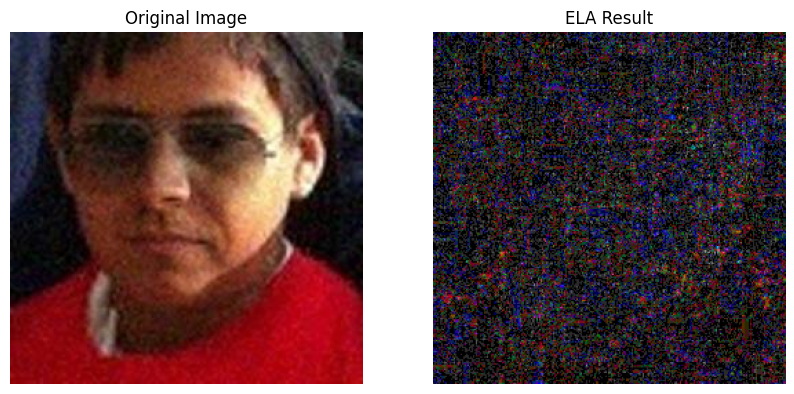

In [1]:
import os
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt

# Set your Google Drive paths
input_image = '/content/drive/MyDrive/ML_Intership/input/input3.jpg'
output_dir = '/content/drive/MyDrive/ML_Intership/output'

# Create output directory if needed
os.makedirs(output_dir, exist_ok=True)

# Define output filename
basename = os.path.splitext(os.path.basename(input_image))[0]
ela_path = os.path.join(output_dir, f'{basename}.ela.png')

# Set quality (adjust between 70-95 for different results)
quality = 85

try:
    # Open and process image
    original = Image.open(input_image)

    # Save temporary resaved version for ELA calculation
    temp_path = os.path.join(output_dir, 'temp.jpg')
    original.save(temp_path, 'JPEG', quality=quality)
    resaved = Image.open(temp_path)

    # Remove temporary file
    os.remove(temp_path)

    # Calculate ELA
    ela = ImageChops.difference(original, resaved)
    max_diff = max([ex[1] for ex in ela.getextrema()])
    scale = 255.0 / max_diff if max_diff != 0 else 0
    ela = ImageEnhance.Brightness(ela).enhance(scale)
    ela.save(ela_path)

    # Display results
    print(f"\n🔍 ELA Analysis Results (Quality: {quality})")
    print(f"Original: {input_image}")
    print(f"Max Difference: {max_diff}")

    # Show images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(ela)
    plt.title('ELA Result')
    plt.axis('off')

    plt.show()

except FileNotFoundError:
    print(f"❌ Error: Input image not found at {input_image}")
except Exception as e:
    print(f"❌ Error during processing: {str(e)}")


🔍 Processing: 1_frame_000003_face.jpg
Max Difference: 14


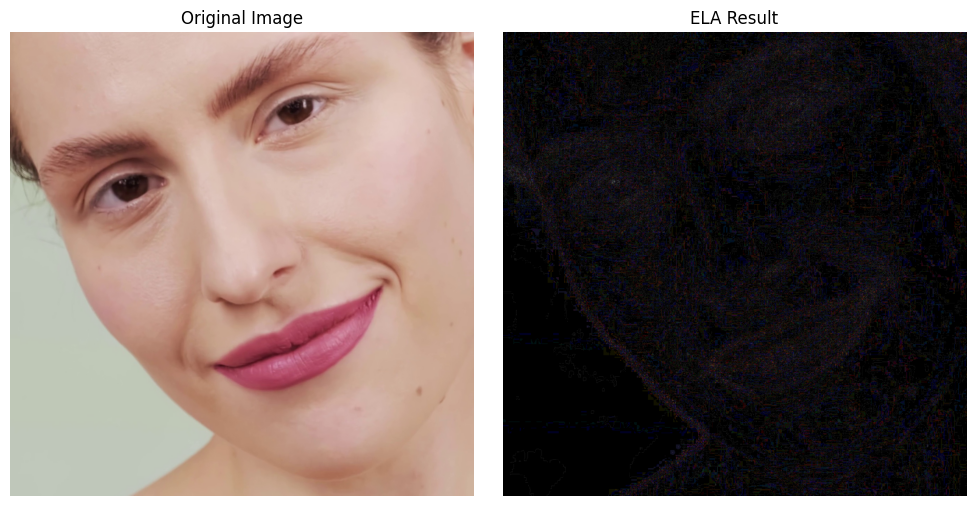


🔍 Processing: 2_frame_000299_face.jpg
Max Difference: 19


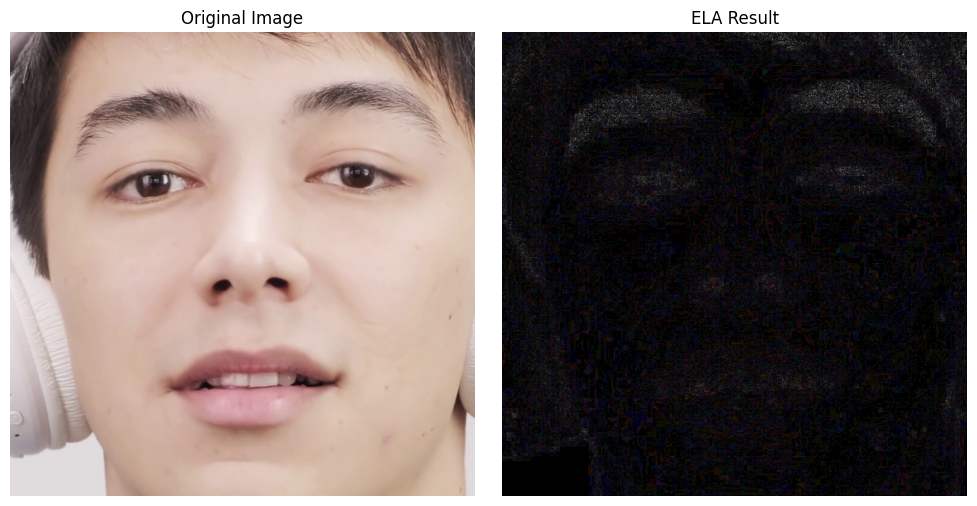


🔍 Processing: alia real.webp
Max Difference: 24


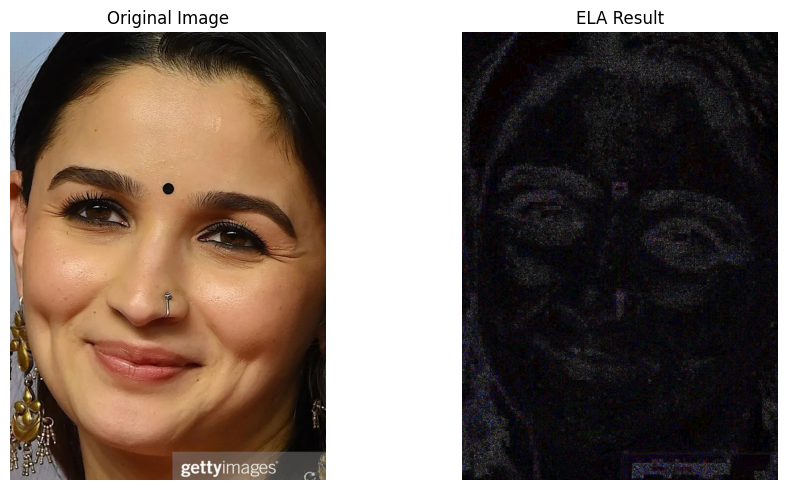


🔍 Processing: hrx real.jpg
Max Difference: 7


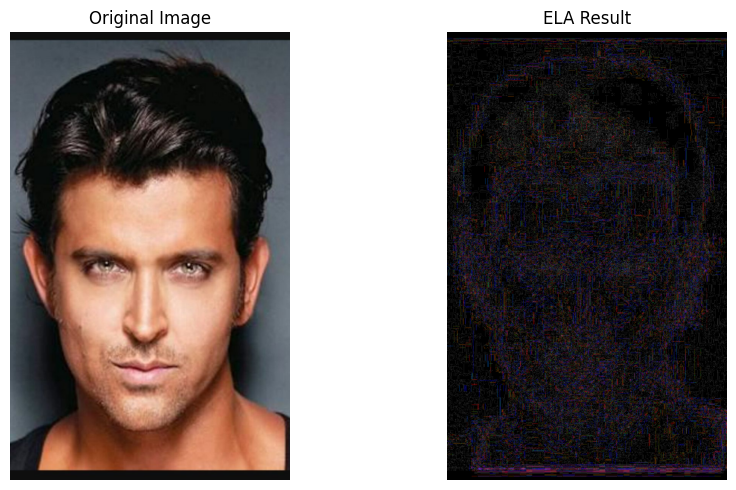

In [4]:
import os
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt

# Set your Google Drive paths
input_dir = '/content/drive/MyDrive/ML_Intership/input_real'
output_dir = '/content/drive/MyDrive/ML_Intership/output_real'

# Create output directory if needed
os.makedirs(output_dir, exist_ok=True)

# Set quality (adjust between 70-95 for different results)
quality = 85

try:
    # Get all image files from input directory
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp','.webp'))]

    if not image_files:
        print(f"❌ No images found in {input_dir}")
    else:
        # Process each image
        for img_file in image_files:
            input_path = os.path.join(input_dir, img_file)

            # Open and process image
            original = Image.open(input_path)

            # Save temporary resaved version for ELA calculation
            temp_path = os.path.join(output_dir, 'temp.jpg')
            original.save(temp_path, 'JPEG', quality=quality)
            resaved = Image.open(temp_path)
            os.remove(temp_path)  # Remove temporary file

            # Calculate ELA
            ela = ImageChops.difference(original, resaved)
            max_diff = max([ex[1] for ex in ela.getextrema()])
            scale = 255.0 / max_diff if max_diff != 0 else 0
            ela = ImageEnhance.Brightness(ela).enhance(scale)

            # Save ELA result
            basename = os.path.splitext(img_file)[0]
            ela_path = os.path.join(output_dir, f'{basename}.ela.png')
            ela.save(ela_path)

            # Display results for this image
            print(f"\n🔍 Processing: {img_file}")
            print(f"Max Difference: {max_diff}")

            # Show images side by side (column-wise)
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

            ax1.imshow(original)
            ax1.set_title('Original Image')
            ax1.axis('off')

            ax2.imshow(ela)
            ax2.set_title('ELA Result')
            ax2.axis('off')

            plt.tight_layout()
            plt.show()

except FileNotFoundError:
    print(f"❌ Error: Input directory not found at {input_dir}")
except Exception as e:
    print(f"❌ Error during processing: {str(e)}")


🔍 Processing: input.jpg
Max Difference: 13


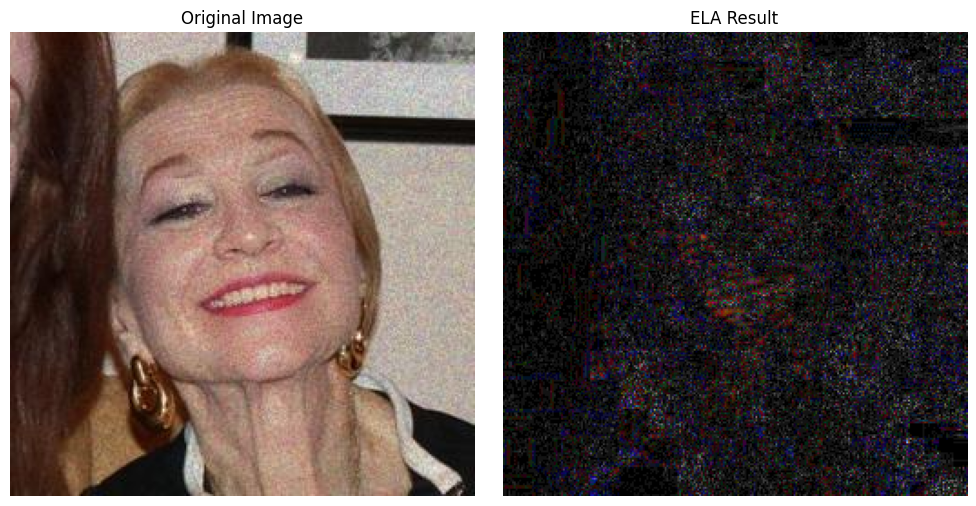


🔍 Processing: input3.jpg
Max Difference: 6


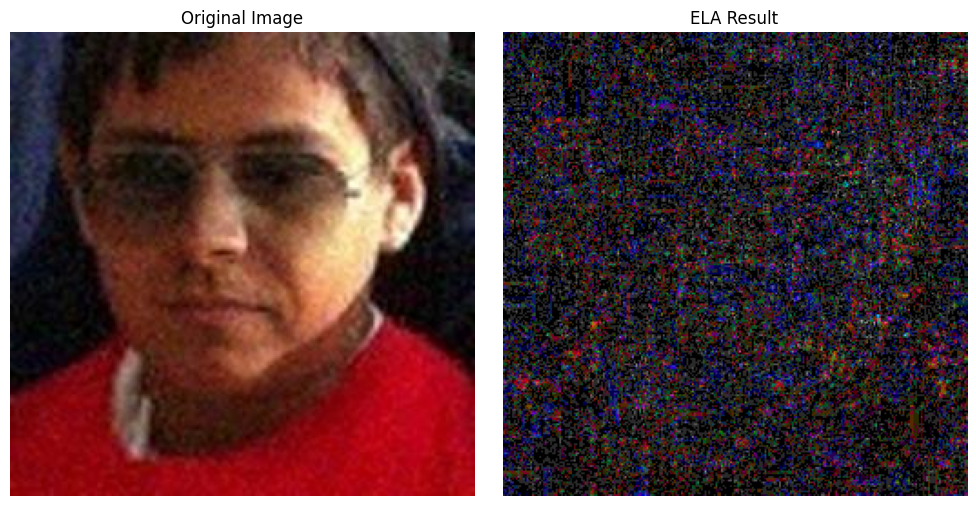


🔍 Processing: akshay_fake.webp
Max Difference: 11


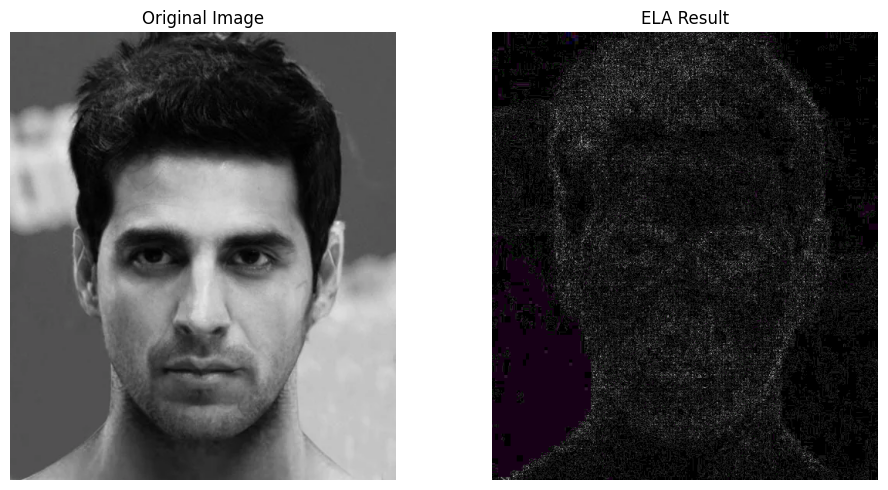


🔍 Processing: shahrukh.jpg
Max Difference: 18


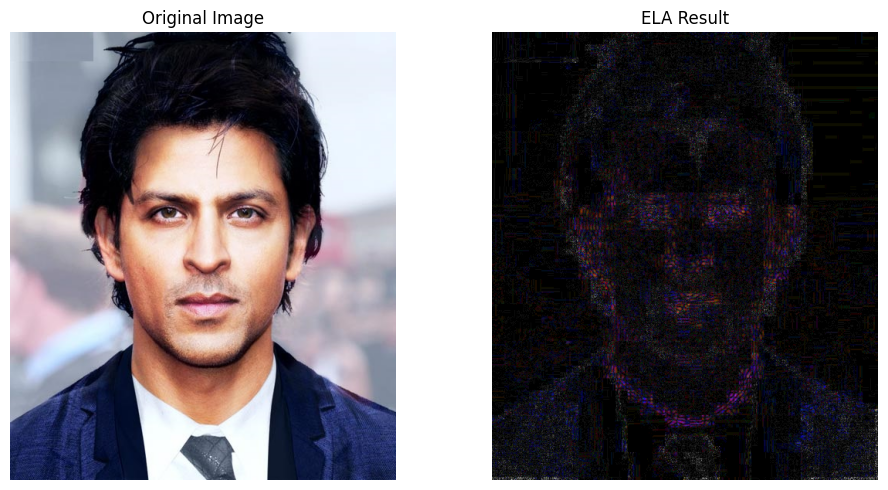

In [5]:
import os
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt

# Set your Google Drive paths
input_dir = '/content/drive/MyDrive/ML_Intership/input_fake'
output_dir = '/content/drive/MyDrive/ML_Intership/output_fake'

# Create output directory if needed
os.makedirs(output_dir, exist_ok=True)

# Set quality (adjust between 70-95 for different results)
quality = 85

try:
    # Get all image files from input directory
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp','.webp'))]

    if not image_files:
        print(f"❌ No images found in {input_dir}")
    else:
        # Process each image
        for img_file in image_files:
            input_path = os.path.join(input_dir, img_file)

            # Open and process image
            original = Image.open(input_path)

            # Save temporary resaved version for ELA calculation
            temp_path = os.path.join(output_dir, 'temp.jpg')
            original.save(temp_path, 'JPEG', quality=quality)
            resaved = Image.open(temp_path)
            os.remove(temp_path)  # Remove temporary file

            # Calculate ELA
            ela = ImageChops.difference(original, resaved)
            max_diff = max([ex[1] for ex in ela.getextrema()])
            scale = 255.0 / max_diff if max_diff != 0 else 0
            ela = ImageEnhance.Brightness(ela).enhance(scale)

            # Save ELA result
            basename = os.path.splitext(img_file)[0]
            ela_path = os.path.join(output_dir, f'{basename}.ela.png')
            ela.save(ela_path)

            # Display results for this image
            print(f"\n🔍 Processing: {img_file}")
            print(f"Max Difference: {max_diff}")

            # Show images side by side (column-wise)
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

            ax1.imshow(original)
            ax1.set_title('Original Image')
            ax1.axis('off')

            ax2.imshow(ela)
            ax2.set_title('ELA Result')
            ax2.axis('off')

            plt.tight_layout()
            plt.show()

except FileNotFoundError:
    print(f"❌ Error: Input directory not found at {input_dir}")
except Exception as e:
    print(f"❌ Error during processing: {str(e)}")